# How Does A Country's GDP and Emmissons profile relate to it's average annual temperature?

## Project 1

### Introduction

The purpose of this study is to set up a framework for observing the relationship between a Country's average annual temperature (the dependent variable) and its GDP and annual emissions (the independent variables). For the sake of clarity, Canada will be used as an example in the Figures and Graphs portion of the study, however, any country in the sample could be used.

Two datasets were combined to form the primary dataset in this study:  "Climate Change: Earth Surface Temperature Data" (from https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data) and Our World in Data CO2 and Greenhouse Gas Emissions database (from https://ourworldindata.org/co2-emissions). The sample from Kaggle includes a number of datasets, however, for the purpose of this study only the "Global Land Temperature By Country" data was used. This dataset includes the average monthly temperature for 243 countries from 1744-2013. The Our World in Data (OWID) sample contains data on annual co2, methane and nitrous oxide emissions, as well as annual GDP by country from 1990-2018. 

Findings from the study include a potential weak positive correlation between Canada's Average Temperature and both GDP and Co2 emissions.

### Data Cleaning/Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
GLT_City_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\archive\\GlobalLandTemperaturesByCountry.csv"
Emmisions_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\data.csv"

In [3]:
#GLT -> Global Land Temperature dataset from Kaggle
#E -> Emmissons dataset from OWID
GLT = pd.read_csv(GLT_City_URL).drop(labels = 'AverageTemperatureUncertainty', axis = 1)
E = pd.read_csv(Emmisions_URL)

**Combing the datasets:** To combine these two data sets, several operations must be performed: 

Missing values need to be dropped, column titles names must use the same naming convention to be merged and the final dataset should contain only matching data from shared time-frames.

In [4]:
#Fixiing column names and dropping missing values
E.rename(columns = {'country':'Country', 'year':'Year'}, inplace = True)
GLT.rename(columns = {'dt':'Year'}, inplace = True)
GLT = GLT.dropna() 
#Generalize monthly inputs by year for merging
GLT['Year'] = GLT['Year'].str[0:4].astype(int)

In [5]:
#Merging data
data = E.merge(GLT, on=['Country','Year'])
index_names = data[data['Country'] == 'United Arab Emirates'].index
data.drop(index_names, inplace = True)

In [6]:
data_annual = data.drop(labels = 'AverageTemperature', axis = 1).drop_duplicates()
#cy -> country year
cy = data_annual[['Country','Year']]
def average(lst):
    return sum(lst)/len(lst)
#dcy -> Data, Country, Years
dcy = data.groupby(['Country','Year'])
#cyt -> country year temperature
avg = []
for country in cy['Country'].unique():
    for year in cy['Year'].unique():
        avg.append(average(dcy.get_group((country, year))['AverageTemperature']))
data_annual['Avg_Annual_Temp'] = avg

### Summary Statistics Tables

In [7]:
sum_stats = data_annual.drop(labels = 'Year', axis = 1).describe()
sum_stats

,gdp,cement_co2,co2,coal_co2,gas_co2,methane,nitrous_oxide,oil_co2,Avg_Annual_Temp
count,3.600000e+03,3510.000000,3600.000000,3599.000000,3599.00000,3600.000000,3600.000000,3599.000000,3600.000000
mean,4.329168e+11,5.828972,174.307535,70.052890,32.51188,46.027850,16.523408,62.548410,18.661510
std,1.401533e+12,34.462331,686.165587,397.784658,120.09953,117.744049,44.425038,217.379003,8.707836
min,2.757300e+08,0.000000,0.000000,0.000000,0.00000,0.040000,0.000000,0.059000,-19.000417
25%,1.638855e+10,0.113000,2.837750,0.000000,0.00000,4.177500,1.440000,1.889000,11.235104
50%,5.156510e+10,0.618000,17.193000,0.451000,1.71400,11.215000,4.715000,8.849000,21.666500
75%,2.631512e+11,2.766500,76.755000,14.101000,18.23750,35.542500,13.635000,36.433000,26.134833
max,1.610840e+13,748.323000,9956.309000,7493.454000,1410.36700,1147.210000,522.800000,2644.237000,30.744750


#### **Explanation:** Interpreting Summary Statistics

**Average Annual Temperature - Dependent Variable:** From this table we can observe the total range of average annual temperatures taken in every country in the dataset from 1990-2013. The lowest annual temperature in the dataset is -19 degrees Celsius and the highest is 30.7 degrees Celsius. The mean is 18.66 degrees Celsius. This particular snapshot of the data doesn't tell us too much as countries in Northern Europe are expected to have drastically different average temperatures from countries in Central Africa for example. Furthermore, without the time trend, we cannot study how temperatures changed, whether they increased or decreased, and by how much. To observe relevant relationships, we must perform a study on a per country basis.

**GDP - Independent Variable:** The summary statistics for GDP gives us a bit more information than Average Temperature. This is because we can observe the range of economic output of countries in our dataset in Real USD in 2011 dollars (see documentation for OWID dataset). The lowest recorded annual GDP is ~276 Million and the highest recorded GDP is ~16.1 Trillion. The mean level of GDP ~429 Million but standard deviation is ~1.4 Trillion so there is a high degree of variance in the sample.

**Emissions - Independent Variable:** For all emissions in the sample data, the lowest recorded emission per country per year is approx 0, meaning that some countries in the sample emitted no greenhouse gasses in any form in a given year. The mean for each demonstrates the average annual emission of countries in this dataset between 1990-2013 in Tons. We can observe from this table that Co2 takes the majority share of greenhouse gas emissions, and, amongst C02 emissions, coal is the highest contributor.

### Figures and Graphs

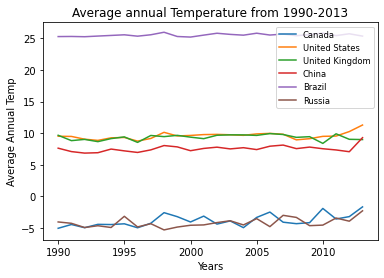

In [60]:
C = ['Canada', 'United States', 'United Kingdom', 'China', 'Brazil', 'Russia',]
for country in C:
    plt.plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'], label = country)
# set axis lables
plt.xlabel("Years")
plt.ylabel("Average Annual Temp")
# set chart title
plt.title("Average annual Temperature from 1990-2013")
plt.legend(loc = 'best', fontsize = 'small')
plt.show()

The figure above shows how average annual temperatures in 6 representative countries change over time. In this small timeframe, it's hard to observe a noticeable change. This being said, in Canada, average annual temperatures seem to have increased by a few degrees in the 23 year time-frame.

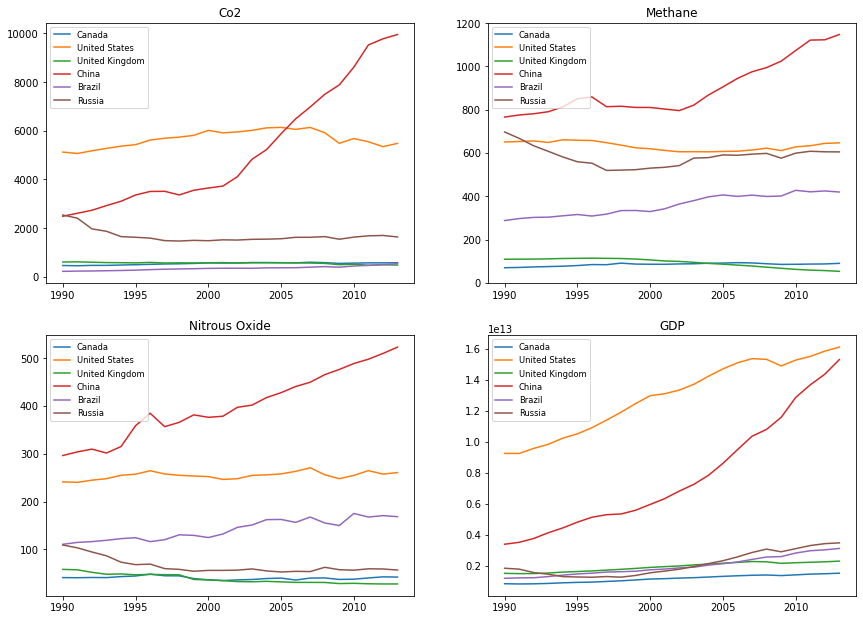

In [53]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['co2'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['methane'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['nitrous_oxide'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gdp'], label = country)
axis[0, 0].set_title('Co2')
axis[0, 1].set_title('Methane')
axis[1, 0].set_title('Nitrous Oxide')
axis[1, 1].set_title('GDP')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

Comment on figures

### Conclusion

By combing the Kaggle data and the OWID data, a new dataset was created that contains 151 countries and their corresponding monthly average temperature, annual GDP and Emissions from 1990 to 2013. With this new dataset, a large number of graphs could be created to illustrate different relationships between variables within the sample. 

In this study, the relationship between Canadian annual average temperatures, GDP and Emissions were plotted in scatterplot graphs to illustrate the general relationship between the dependent variable (temperature) and a number of independent variables. A strong positive relationship between annual average temperature and GDP, and a weak positive relationship between annual average temperature and Co2 was observed. These insights make intuitive sense because annual average temperatures seem to be increasing over time, as do both Co2 and GDP in Canada. 
